In [41]:
import numpy as np
import sklearn
from skimage import morphology
import cv2
import os
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.transform import rotate
from sklearn.cluster import KMeans
from PIL import Image

imgDir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, "data"))

### Cut Mask Function


In [42]:
def cut_mask(mask):
    
    # input is numpy array mask
    col_sums = np.sum(mask, axis=0)     # sums up the values between 0 and 1
    row_sums = np.sum(mask, axis=1)     # shows if any row or column contains anything but 0s

    active_cols = []        # lists all the columns where there is no lesion
    for index, col_sum in enumerate(col_sums):  # takes all columns
        if col_sum != 0:                        # if the full column is 0, it's not added to the list
            active_cols.append(index)

    active_rows = []        # analog for rows
    for index, row_sum in enumerate(row_sums):
        if row_sum != 0:
            active_rows.append(index)

    # taking the bordering rows and columns of the mask (excluding the black edges where there is nothing)
    col_min = active_cols[0]
    col_max = active_cols[-1]
    row_min = active_rows[0]
    row_max = active_rows[-1]

    # saving the new mask
    cut_mask_ = mask[row_min:row_max+1, col_min:col_max+1]

    return cut_mask_


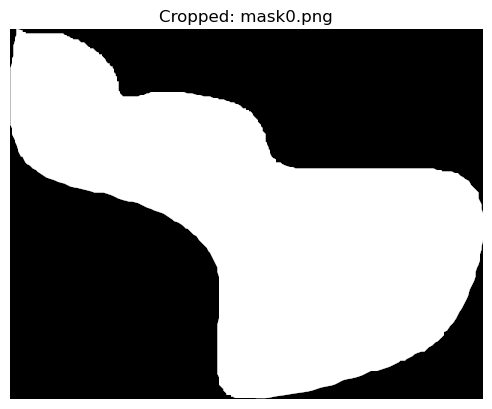

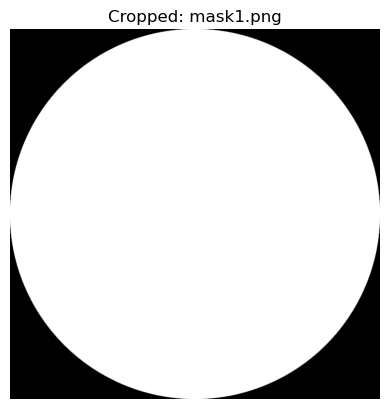

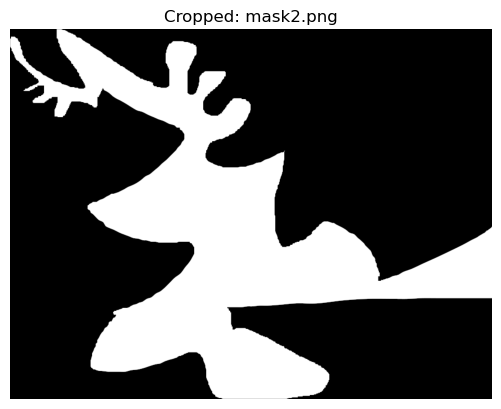

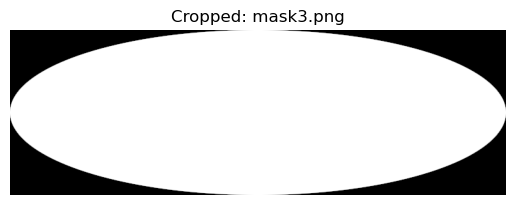

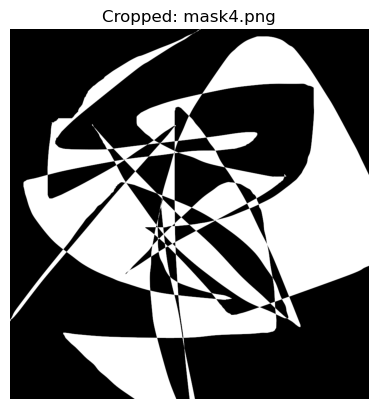

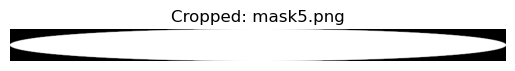

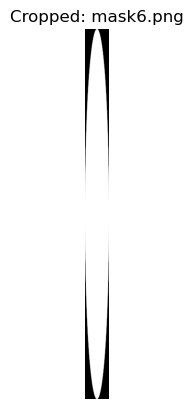

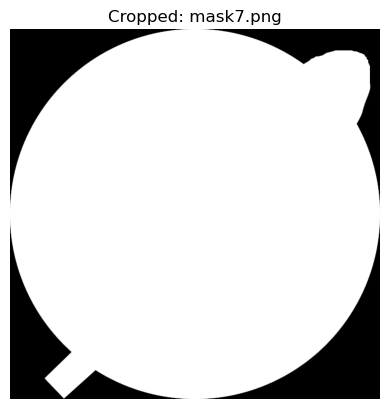

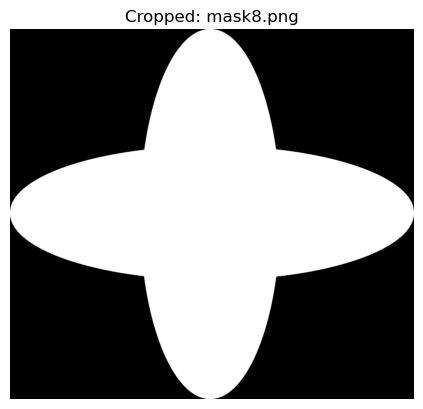

In [43]:
pathh = "2025-FYP-Final-GroupE/data/maskTest"
for filename in os.listdir(pathh):
    if filename.endswith(".png"):
        path = os.path.join(pathh, filename)

        # Load the mask image as grayscale
        mask_image = Image.open(path).convert("L")  # L = 8-bit grayscale
        mask_array = np.array(mask_image)

        cropped = cut_mask(mask_array)

        plt.imshow(cropped, cmap="gray")
        plt.title(f"Cropped: {filename}")
        plt.axis("off")
        plt.show()

### Cut Image By Mask

In [44]:
def cut_im_by_mask(image, mask):
    
    # same as previous function
    col_sums = np.sum(mask, axis=0)
    row_sums = np.sum(mask, axis=1)

    active_cols = []
    for index, col_sum in enumerate(col_sums):
        if col_sum != 0:
            active_cols.append(index)

    active_rows = []
    for index, row_sum in enumerate(row_sums):
        if row_sum != 0:
            active_rows.append(index)

    col_min = active_cols[0]
    col_max = active_cols[-1]
    row_min = active_rows[0]
    row_max = active_rows[-1]

    #except the cutting is applied to the image itself and not the mask
    cut_image = image[row_min:row_max+1, col_min:col_max+1]

    return cut_image

In [ ]:
img = Image.open("bramble_cropped.jpg"); # replace with any image for testing of size of the mask
img_array = np.array(img)
pathh = "2025-FYP-Final-GroupE/data/maskTest"

for filename in os.listdir(pathh):
    if filename.endswith(".png"):
        path = os.path.join(pathh, filename)

        mask_image = Image.open(path).convert("L")
        mask_array = np.array(mask_image)

        cropped_img = cut_im_by_mask(img_array, mask_array)

        mask_overlay = np.zeros_like(img_array)
        mask_overlay[:, :, 0] = mask_array

        plt.figure(figsize=(12, 4))

        # 1. Original image
        plt.subplot(1, 3, 1)
        plt.imshow(img_array)
        plt.title("Original Image")
        plt.axis("off")

        # 2. Image with mask overlay
        plt.subplot(1, 3, 2)
        plt.imshow(img_array)
        plt.imshow(mask_overlay, alpha=0.5, cmap='Reds')  # Overlay mask in red
        plt.title("Mask Overlay")
        plt.axis("off")

        # 3. Cropped result
        plt.subplot(1, 3, 3)
        plt.imshow(cropped_img)
        plt.title("Cropped")
        plt.axis("off")

        plt.suptitle(f"File: {filename}", fontsize=14)
        plt.tight_layout()
        plt.show()

### Find Midpoint V1

In [ ]:
def find_midpoint_v1(image):
    
    row_mid = image.shape[0] / 2     # nr of the middle row
    col_mid = image.shape[1] / 2     # nr of the middle column
    return row_mid, col_mid

In [ ]:
midpoint = find_midpoint_v1(img_array)
print("Midpoint (row nr, col nr):", midpoint)

Midpoint (row, col): (511.5, 512.0)
